#**Caso: Predicción de abandono de clientes en una empresa de telecomunicaciones**
**Contexto:**

Una empresa de telecomunicaciones quiere reducir la pérdida de clientes (churn). Para ello, te han proporcionado un conjunto de datos históricos sobre sus clientes actuales y pasados. Tu tarea es analizar estos datos y construir un modelo que prediga la probabilidad de que un cliente abandone la empresa.

🧭 Tareas a realizar

1. Análisis Exploratorio de Datos (EDA)

  * Describir el conjunto de datos: tipos de variables, valores nulos, estadísticas básicas.

  * Visualizaciones clave (distribuciones, correlaciones, etc.).

  * Identificar patrones relacionados con el abandono (Churn).

2. Limpieza y Preparación de Datos

  * Tratamiento de valores nulos.

  * Codificación de variables categóricas.

  * Normalización o estandarización si es necesario.

3. Modelado Predictivo

  * Separar conjunto de entrenamiento y prueba.

  * Probar al menos dos modelos de clasificación (ej: Regresión Logística, Árboles de Decisión, Random Forest, etc.).

  * Evaluar los modelos (precisión, recall, F1-score, curva ROC).

5. Interpretación y Recomendaciones

  * ¿Qué variables son más importantes para predecir el churn?

  * ¿Qué acciones propondrías a la empresa para reducir la pérdida de clientes?

6. Entrega

  * Un notebook Jupyter o Google Colab con el análisis completo.

  * Un resumen ejecutivo (máximo 1 página) explicando los hallazgos clave y recomendaciones, escrito para alguien no técnico.

In [120]:
# ------------------------- Librerias requeridas --------------------------------------------

# Tratamiento de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

# Visualización de datos
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import plotly.express as px

# Selección de variables y medición del desempeño
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV 

# Modelos Candidatos 
from sklearn.linear_model import LogisticRegression      # Regresión logística
from sklearn.ensemble import RandomForestClassifier      # Clasificador bosques aleatorios
from xgboost import XGBClassifier                        # XGBoost 

# Datos
#!pip install "kagglehub[pandas-datasets]"
import kagglehub as kg
from kagglehub import KaggleDatasetAdapter

# Funciones propias
import funciones as fnc


#  Exploración inicial de los datos 

In [121]:
# Importación de los datos

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kg.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)

df.head(5)


C:\Users\gvand\AppData\Local\Temp\ipykernel_7296\393107368.py:5: DeprecationWarning:

load_dataset is deprecated and will be removed in a future version.



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
# Información general de los datos 
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
# Verificación de Nulos y duplicados
df.isna().sum()          
df.duplicated().sum()     

0

In [124]:
# Descripción estadística
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [125]:
# Transformacion de la Variable "TotalCharges"
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan) # Este código fue necesario debido a que presentaba datos NaN
df['TotalCharges'] = df['TotalCharges'].astype(float) 

In [126]:
# Datos faltantes
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Eliminar datos "NaN"
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Conclusiones: 
- La base de datos no presenta valores nulos ni registros duplicados.
- El conjunto de datos está compuesto por 21 variables, las cuales se distribuyen entre variables numéricas, categóricas y binarias.
- El análisis estadístico muestra que solo el 16 % de los clientes son adultos mayores, con una antigüedad promedio de 32 meses y gastos mensuales medios de 64,76.
- Fue necesario realizar una primera transformación en la variable "TotalCharges", ya que aunque representa valores numéricos, originalmente estaba clasificada como texto (object). Esta conversión fue esencial para el análisis exploratorio.
- Dado que los valores NaN en la variable "TotalCharges" representan solo una fracción muy pequeña del total (11 de 7,043 registros), se optó por eliminar estas filas.
- Tras la eliminación de los 11 registros que presentaban valores "NaN" en la variable "TotalCharges", el conjunto de datos quedó conformado por 7,038 registros

# Análisis Exploratorio de Datos (EDA)

## Análisis Variable Objetivo

In [129]:
# Variable Respuesta (target)
print(df['Churn'].value_counts())
_ = df['Churn'].value_counts()

# Crear el gráfico de torta
fig = px.pie(values = _, names = _.index)
fig.show()

Churn
No     5163
Yes    1869
Name: count, dtype: int64


Conclusiones: 
- El 26.5% han renunciado al servicio, equivalente a un total de 1,869 clientes. 
- La distribución de clases binarias presenta un desequilibrio moderado. 

## Análisis de Variables Categóricas

In [130]:
# Información de las variables categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col not in ['customerID', 'Churn']]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

--- gender ---
gender
Male      3549
Female    3483
Name: count, dtype: int64


--- Partner ---
Partner
No     3639
Yes    3393
Name: count, dtype: int64


--- Dependents ---
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


--- PhoneService ---
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


--- MultipleLines ---
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


--- InternetService ---
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


--- OnlineSecurity ---
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


--- OnlineBackup ---
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


--- DeviceProtection ---
DeviceProtection
No                     3094
Yes                    2418
No internet ser

In [131]:
# Genero
fnc.vovsenc(df, 'gender', 'Count', 'Churn')

- No se observa una dominancia de género en el abandono; las mujeres superan a los hombres solo por 9 casos

In [132]:
# Personas mayores
fnc.vovsenc(df, 'SeniorCitizen', 'Count', 'Churn')

- La mayoría de los clientes no son ciudadanos senior.
- Entre los clientes que sí son ciudadanos senior, aunque son muchos menos, la proporción de clientes que se van  es visiblemente mayor en comparación con los no seniors.

In [133]:
# Pareja
fnc.vovsenc(df, 'Partner', 'Count', 'Churn')

- Los clientes que no tienen pareja muestran una mayor proporción de deserción.

In [134]:
# Personas dependientes
fnc.vovsenc(df, 'Dependents', 'Count', 'Churn')

- Los clientes que no son dependientes son más propensos a cancelar el servicio.

In [135]:
# Contrato
fnc.vovsstr(df, 'Contract', 'Count', 'Churn')

- Los clientes con contrato mensual tienen una probabilidad de desertar significativamente mayor que aquellos con contratos anuales o bienales.

In [136]:
# Servicio de internet
fnc.vovsstr(df, 'InternetService', 'Count', 'Churn')

- Los clientes con Internet de fibra óptica son más propensos a desertar que los que tienen DSL o no tienen servicio.

In [137]:
# Soporte técnico
fnc.vovsstr(df, 'TechSupport', 'Count', 'Churn')

- Tener soporte técnico parece estar asociado con una menor tasa de deserción.
- Los clientes sin soporte técnico probablemente experimenten problemas no resueltos, lo que podría motivar su salida.

In [138]:
# Metodo de pago
fnc.vovsstr(df, 'PaymentMethod', 'Count', 'Churn')

- Los clientes que usan cheque electronico son más propensos a desertar que los otros metodos de pago.

## Análisis de Variables Numericas

In [139]:
# Permanencia
fnc.vovsnum(df, 'Churn', 'tenure')

In [140]:
fnc.vovsnum(df, 'Churn', 'MonthlyCharges')

# Modelos

## Terminar preprocesado

In [141]:
# Reemplazar "No internet service" y "No phone service" por "No"
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)

In [142]:
# Cambiar los valores "Yes" por 1 y "No" por 0
df = df.replace({'Yes': 1, 'No': 0})

In [143]:
# Eliminar variable "customerID"
df.drop(["customerID"], axis=1, inplace=True)

In [144]:
# Recategorización de la variable "tenure"
condicion = [((df.tenure >= 0)&(df.tenure <= 12)), ((df.tenure > 12)&(df.tenure <= 24)), 
    ((df.tenure > 24)&(df.tenure <= 36)),((df.tenure > 36)&(df.tenure <= 48)),
    ((df.tenure > 48)&(df.tenure <= 60)), (df.tenure > 60)]

opcion = [0, 1, 2, 3, 4, 5] # [0-1año, 1-2años, 2-3años, 3-5años, 4-5años, 5 o más]

df['tenure_ran'] = np.select(condicion, opcion)
df.drop(["tenure"], axis=1, inplace=True)

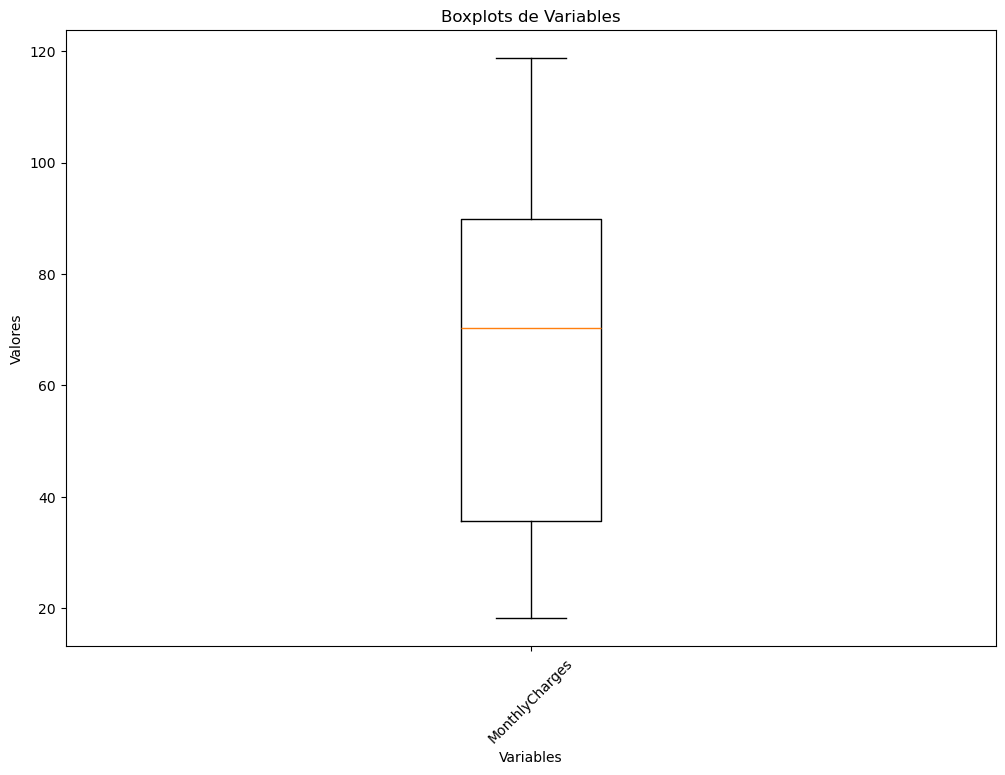

In [ ]:
# Tratamiento de atípicos 
var = ['MonthlyCharges', 'TotalCharges'] 
 
fig, ax = plt.subplots(figsize=(12, 8))

ax.boxplot(df[var].values, labels=var)
ax.set_title('Boxplots de Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

plt.xticks(rotation=45)
plt.show()

No hay presencia de atípicos, por lo que no fue necesario un tratamiento.  

In [154]:
# Verificación
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   MultipleLines     7032 non-null   int64  
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   int64  
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64
